# Homework 14: Multiple Linear Regression and Logistic Regression

**Initial Set-up**

In [1]:
# Load in the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read each data file that we will be using
bottle = pd.read_csv('bottle.csv', low_memory = False)
cast = pd.read_csv('cast.csv', low_memory = False)
diabetes = pd.read_csv('diabetes.csv')

### 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi  

Before pre-processing, I will first join the cast and the bottle data set. That way, I can process and clean everything together.

In [2]:
# View the cast column list
cast_list = cast.columns
print(cast_list)

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')


In [3]:
# view the bottle column list
bottle_list = bottle.columns
print(bottle_list)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


See which columns we have in common between the two data frames

In [4]:
# Create an empty list to append matching vars
match_list = []

# Iterate through var names in cast
for col_cast in cast_list:
    # Iterate through var names in bottle
    for col_bottle in bottle_list:
        # Check if a var name in cast is equal to a var name in bottle
        if col_cast == col_bottle:
            # Append the matches to our list
            match_list.append(col_bottle)
            
# print list to view
print(match_list)

# 'Cst_Cnt' and 'Sta_ID' appear to be the only two columns we would want to join on

['Cst_Cnt', 'Sta_ID']


In [5]:
# View the matching columns from cast
cast[['Cst_Cnt', 'Sta_ID']].head()

# See how many unique variables are in each
cast['Cst_Cnt'].nunique() # 34404 unique
cast['Sta_ID'].nunique() # 2634 unique

len(cast.index) # 34404 rows

34404

In [6]:
# View the matching columns from bottle
bottle[['Cst_Cnt', 'Sta_ID']].head()

# Compare from bottle set to see if the var lengths are the same
bottle['Cst_Cnt'].nunique() # 34404 unique
bottle['Sta_ID'].nunique() # 2634 unique

len(bottle.index) # 864863

864863

**About this Data Set**

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) collects oceanic biological samples to help measure and track the effects of climate change. Researches leave on cruises off of California to collect hundreds of indicators of marine health. 

The data are organized into two primary tables: Cast and bottle. 

The cast file represents the cast (or 'net') that contains many bottle samples. It contains information about the ship, time of year and geographic indicators, among many other measures. The bottle data set contains individual-level sample information, such as water salinity, depth, oxygen, temperature, etc. 

We can merge the two files on the cast count variable to gain insight from both data sets.

**Merge Files before Pre-processing**

In [7]:
# left outer join so that we maintain all the rows in bottle, but match them to their Cst_Cnt from the other df
bottle_cast = pd.merge(bottle, cast, on='Cst_Cnt', how='left')
# View merged data frame
bottle_cast.head()

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [8]:
# Check the length of the new data frame
len(bottle_cast.index) # We remain with 864863 rows

864863

In [9]:
# View basic summary
bottle_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864863 entries, 0 to 864862
Columns: 134 entries, Cst_Cnt to Visibility
dtypes: float64(97), int64(15), object(22)
memory usage: 890.8+ MB


- There are 864,863 rows and 134 features
- Most variables are floats or integers
- 22 variables are non-numerical

There are 134 total columns to work with from this data frame. It is unlikely that all columns will be useful to us for our final analysis. We will begin by dropping columns with >50% null values, as those measures won't be as reliable. 

## Pre-processing

**Clean the null values: Remove columns with more than half their data missing**

In [10]:
# Which features contain more than 50% null values?

# Create empty list to append column names, where there are over 50% null
null_vars50 = []

# Iterate through columns and values of data frame
for col, val in bottle_cast.iteritems():
    # Find columns where there are nulls
    if bottle_cast[col].isnull().sum() > 0:
        # Divide the number of nulls by the total values in the data set
        # Multiply by 100 and round by 2 decimal points for percentage
        percent_null = round((((bottle_cast[col].isnull().sum())/864863)*100),2)
        # Check to see which are greater than 50
        if percent_null >= 50:
            # print the results in a format that is easy to read
            print(f'{col}: {percent_null}%')
            # append those columns to the list
            null_vars50.append(col)   

BtlNum: 86.28%
T_qual: 97.33%
S_qual: 91.34%
O_qual: 78.65%
SThtaq: 92.39%
O2Satq: 74.82%
ChlorA: 73.95%
Phaeop: 73.95%
PO4uM: 52.21%
SiO3uM: 59.06%
NO2uM: 60.97%
NO3uM: 60.99%
NH3uM: 92.49%
C14As1: 98.33%
C14A1p: 98.52%
C14As2: 98.33%
C14A2p: 98.53%
DarkAs: 97.38%
DarkAp: 97.63%
MeanAs: 97.38%
MeanAp: 97.63%
IncTim: 98.33%
LightP: 97.84%
R_SIO3: 59.06%
R_PO4: 52.21%
R_NO3: 60.99%
R_NO2: 60.97%
R_NH4: 92.49%
R_CHLA: 73.95%
R_PHAEO: 73.95%
R_SAMP: 85.89%
DIC1: 99.77%
DIC2: 99.97%
TA1: 99.76%
TA2: 99.97%
pH2: 100.0%
pH1: 99.99%
DIC Quality Comment: 99.99%
Secchi: 84.59%
ForelU: 94.34%
Order_Occ: 69.29%
Cruz_Leg: 95.66%
IntChl: 61.7%
IntC14: 93.94%
Inc_Str: 93.93%
Inc_End: 93.93%
PST_LAN: 93.99%
Civil_T: 93.99%
TimeZone: 85.87%
Wave_Dir: 64.98%
Wave_Ht: 65.97%
Wave_Prd: 67.02%
Cloud_Typ: 70.94%
Cloud_Amt: 66.18%
Visibility: 72.78%


In [11]:
# Find length of null_vars50 list
len(null_vars50) # 55 columns

55

There are 55 columns with greater than 50% missing values. These features will not produce very robust results, so they can now be removed in the next step.

In [12]:
# Now, we can remove those features from the data set

# Create a new df that has all columns from 'null_vars50' removed
bottle_cast_df = bottle_cast.drop(null_vars50, axis=1)
bottle_cast_df.head()

# Now, we have 79 workable columns!

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0


**Handle Missing Data: Fill the remaining null values**

There are still many features that have null values, which will not be helpful in our modeling. We can go ahead and fill those in now. 

First, we will fill the numeric values.

In [13]:
# See which columns still have missing values

# Create empty list to append null values
still_null = []

# Iterate through columns and values of data frame
for col, val in bottle_cast_df.iteritems():
    # Find columns that have null values
    if bottle_cast_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        still_null.append(col)

# View the columns with null values
print(still_null)

['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'T_prec', 'S_prec', 'P_qual', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'Distance', 'Time', 'Bottom_D', 'Ship_Name', 'Event_Num', 'Data_Or', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T', 'Wea']


In [14]:
# List for numeric null columns
numeric_null = []
# List for categorical null columns
object_null = []

# Iterate through the list of columns that are still null
for var in still_null:
    # Find columns that are NOT of object type (i.e. they are float or integer)
    if bottle_cast_df[var].dtypes != 'O':
        # Append numeric columns to numeric list
        numeric_null.append(var)
    # Find the columns that are object type
    else:
        # Append the objects to the object list
        object_null.append(var)

In [15]:
# View descriptive statistics for the numeric values
bottle_cast_df[numeric_null].describe() # 37 total null numeric columns

,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,T_prec,S_prec,P_qual,Chlqua,...,R_O2Sat,Distance,Bottom_D,Event_Num,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
count,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,853900.000000,817509.000000,673755.000000,639166.000000,...,666448.000000,509791.000000,805636.000000,864797.000000,837916.000000,836699.000000,467803.000000,468168.000000,466802.000000,683278.000000
mean,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,2.017148,2.716787,8.999996,8.999848,...,57.192940,-131.446022,2583.103636,1426.232754,27.424353,11.460002,1016.444375,16.265046,14.436088,1.349596
std,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,0.148498,0.450559,0.003655,0.012318,...,37.060537,121.681199,1494.869009,1177.835012,9.319925,6.784773,9.531173,2.630483,2.561509,1.151674
min,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,1.000000,2.000000,6.000000,8.000000,...,-0.100000,-1920.150000,7.000000,1.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000
25%,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,2.000000,2.000000,9.000000,9.000000,...,21.200000,-196.700000,1152.000000,502.000000,27.000000,6.000000,1013.900000,14.500000,12.800000,1.000000
50%,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,2.000000,3.000000,9.000000,9.000000,...,54.500000,-101.610000,3075.000000,1109.000000,31.000000,10.000000,1016.500000,16.100000,14.300000,1.000000
75%,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,2.000000,3.000000,9.000000,9.000000,...,97.600000,-38.410000,3931.000000,1964.000000,33.000000,16.000000,1019.300000,17.900000,16.000000,2.000000
max,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,3.000000,3.000000,9.000000,9.000000,...,214.100000,-0.141000,8230.000000,30022.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000


In [16]:
# Fill the numeric NAs with the median value

# import statistics to use median function
import statistics as st

# Iterate through variables to fill the NAs with their median
for var in numeric_null:
    # Fill the null value with median
    # Some variables have NaN as their middle value. 
      # Therefore, "dropna" as part of equation.
    bottle_cast_df[var].fillna(st.median(bottle_cast_df[var].dropna()), inplace=True)

Now, we will fill the missing values of our object columns (there are only 3 to handle)

- Time: Fill with '00:00:00' which will help us later when we separate the columns
- Ship_Name: Fill with "UNKNOWN"
- Data_Or: Fill with 999, which is a universal value for 'unknown'

In [17]:
# View the columns that are in the object list
bottle_cast_df[object_null].tail()

,Time,Ship_Name,Data_Or
864858,22:39:25,RV SALLY RIDE,3101
864859,22:39:25,RV SALLY RIDE,3101
864860,22:39:25,RV SALLY RIDE,3101
864861,22:39:25,RV SALLY RIDE,3101
864862,22:39:25,RV SALLY RIDE,3101


In [18]:
# Iterate through the object_null list
for var in object_null:
    # Fill the time variable
    if var == 'Time':
        bottle_cast_df[var] = bottle_cast_df[var].fillna('00:00:00')
    # Fill the ship name variable
    elif var == 'Ship_Name':
        bottle_cast_df[var] = bottle_cast_df[var].fillna('UNKNOWN')
    # Fill the Data_Or variable
    else:
        bottle_cast_df[var] = bottle_cast_df[var].fillna(999)

In [19]:
# Check to confirm there are no nulls in the full data set

# Iterate through full data set
for col, var in bottle_cast_df.iteritems():
    # Check to see where nulls are greater than 0
    if bottle_cast_df[col].isnull().sum() > 0:
        # Print any cols that still have nulls
        print(col)
        
# Nothing printed! Woohoo!

**Convert the Categorical Features to Numeric**

Now that we have removed columns with more than half their data missing, and now that we have filled in all the remaining null values, we can convert any non-numeric features to be numeric.

In [20]:
# First check to see which of our features are non-numeric

# Empty list to append categorical values to
cat_list = []

# Iterate through variables to see which are object types (everything else is int or float)
for col, val in bottle_cast_df.iteritems():
    # Check which are objects
    if bottle_cast_df[col].dtypes == 'O':
        # Append to list
        cat_list.append(col)
        
# print the list
print(cat_list)

['Sta_ID_x', 'Depth_ID', 'Cruise_ID', 'Cast_ID', 'Sta_ID_y', 'Sta_Code', 'Date', 'Time', 'Lat_Hem', 'Lon_Hem', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num']


In [21]:
len(cat_list) # 16 Total objects

16

In [22]:
# View the variables to get an overview of what they look like
bottle_cast_df[cat_list].head()

,Sta_ID_x,Depth_ID,Cruise_ID,Cast_ID,Sta_ID_y,Sta_Code,Date,Time,Lat_Hem,Lon_Hem,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Data_Or,Cruz_Num
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,999,4903
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,999,4903
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,999,4903
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,999,4903
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,999,4903


In [23]:
# First, I will fix the date time variable

# Join the date variable and the time variable into one
bottle_cast_df['DateTime'] = bottle_cast_df['Date'].astype(str) + ' ' + bottle_cast_df['Time'].astype(str)
# View the new variable
bottle_cast_df['DateTime'].head()

0    03/01/1949 09:30:00
1    03/01/1949 09:30:00
2    03/01/1949 09:30:00
3    03/01/1949 09:30:00
4    03/01/1949 09:30:00
Name: DateTime, dtype: object

In [24]:
# Load module to use datetime function
from datetime import datetime

# Change string variable to datetime format for our feature engineering
bottle_cast_df['DateTime'] = pd.to_datetime(bottle_cast_df['DateTime'])

In [25]:
# Extract the individual months, days, years, times, etc. for feature engineering
bottle_cast_df['Month'] = bottle_cast_df['DateTime'].apply(lambda row: row.month)
bottle_cast_df['Day'] = bottle_cast_df['DateTime'].apply(lambda row: row.day)
bottle_cast_df['Year'] = bottle_cast_df['DateTime'].apply(lambda row: row.year)
bottle_cast_df['Hour'] = bottle_cast_df['DateTime'].apply(lambda row: row.hour)
bottle_cast_df['Minute'] = bottle_cast_df['DateTime'].apply(lambda row: row.minute)

# We don't need to extract seconds because they are all zeros

In [26]:
# Confirm they are in the proper data type format
bottle_cast_df[['Month', 'Day', 'Year', 'Hour', 'Minute']].dtypes

Month     int64
Day       int64
Year      int64
Hour      int64
Minute    int64
dtype: object

In [27]:
# Verify that our feature engineering was correct
bottle_cast_df[['DateTime', 'Month', 'Day', 'Year', 'Hour', 'Minute']].head()

,DateTime,Month,Day,Year,Hour,Minute
0,1949-03-01 09:30:00,3,1,1949,9,30
1,1949-03-01 09:30:00,3,1,1949,9,30
2,1949-03-01 09:30:00,3,1,1949,9,30
3,1949-03-01 09:30:00,3,1,1949,9,30
4,1949-03-01 09:30:00,3,1,1949,9,30


In [28]:
# List of vars to drop, now that we have created others
drop_list = ['Date', 'Time', 'DateTime']

The remaining object variables are ID types and/or other types of categorical columns that can easily be factorized. 

In [29]:
# Iterate through the variables in the categorical list
for var in cat_list:
    bottle_cast_df[var] = pd.factorize(bottle_cast_df[var])[0] + 1 # add 1 so that we aren't starting with 0

In [30]:
# Drop the variables that are no longer needed
final_df = bottle_cast_df.drop(drop_list, axis=1)

In [31]:
# Confirm no object types: 
for col, val in final_df.iteritems():
    if final_df[col].dtypes == 'O':
        print(col)
# Nothing printed, so we should be good!

In [32]:
# View final data frame
final_df.head() # 80 total columns

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Day,Hour,Minute
0,1,1,1,1,0,10.50,33.440,3.44,25.649,54.4,...,1,23.0,18.0,1016.5,16.1,14.3,2.0,1,9,30
1,1,2,1,2,8,10.46,33.440,3.44,25.656,54.4,...,1,23.0,18.0,1016.5,16.1,14.3,2.0,1,9,30
2,1,3,1,3,10,10.46,33.437,3.44,25.654,54.4,...,1,23.0,18.0,1016.5,16.1,14.3,2.0,1,9,30
3,1,4,1,4,19,10.45,33.420,3.44,25.643,54.4,...,1,23.0,18.0,1016.5,16.1,14.3,2.0,1,9,30
4,1,5,1,5,20,10.45,33.421,3.44,25.643,54.4,...,1,23.0,18.0,1016.5,16.1,14.3,2.0,1,9,30


### 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

After cleaning our data set and performing some pre-processing steps, we had 80 columns total. Of course, not all 80 will be necessary in building a model to predict water temperature. Therefore, we can continue to prune our data frame until only our variables of interest are solidified. 

From there, we might need to continue some additional pre-processing measures. 

**Redundant Features**

First, I will look at the meta data to see which features are redundant, based on their descriptions.

- T_prec and S_prec just tell us how many units past decimal we have, so we can drop those

- Bottom depth and depth in meters are different ways of expressing very similar things
    - DROP: Bottom_D
    
- Temperature measures: R_TEMP, R_POTEMP, and T_degC are all the same 
    - DROP: R_TEMP, R_POTEMP
    
- Reported measures: In general, the reported values are redundant
    - DROP: 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA',
       'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES' 
       
- Oxygen measures: The types of oxygen metrics are technically different, but still related to each other. We will keep the O2Sat variable, since saturation also inherently measures both total oxygen and dissolved oxygen.
    - DROP: 'O2ml_L', 'Oxy_µmol/Kg'
    
- Density measures:
    - DROP: R_SIGMA
    
- Date/time measures: There are many different units of time in this data set. They include: Quarter of the year, 'Year', 'Month', 'Julian_Date', 'Julian_Day', 'Day', 'Hour'. We are not conducting a time series analysis on this data set and are not adjusting for seasonality. Therefore, the only time variable that could make sense is 'year' (although, we will probably drop that later too).
    - DROP: 'Month', 'Julian_Date', 'Julian_Day', 'Day', 'Hour', 'Quarter', 'Minute'
    
- Location measures: Distance, 'Lat_Dec', 'Lat_Deg', 'Lat_Min', 'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem'; These are all different measures of latitude and longitude. However, the distance variable takes both lat and lon into account, so we will drop everything except for the distance masure
    - DROP: Lat_Dec, 'Lat_Min', 'Lat_Hem', 'Lon_Dec', 'Lon_Min', 'Lon_Hem', 'Lat_Deg', 'Lon_Deg'
    
- ID measures: 'Sta_ID_x' and 'Sta_ID_y' are just copies from the join
    - DROP: 'Sta_ID_y'

In [36]:
# Drop the redundant columns
no_redun = final_df.drop(['Bottom_D', 'R_TEMP', 'R_POTEMP', 'R_Depth', 'R_SALINITY', 'R_SIGMA', 
                          'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES', 'O2ml_L', 'Oxy_µmol/Kg',
                         'Month', 'Julian_Date', 'Julian_Day', 'Day', 'Hour', 'Quarter', 'Minute',
                         'Lat_Dec', 'Lat_Min', 'Lat_Hem', 'Lon_Dec', 'Lon_Min', 'Lon_Hem', 'Lat_Deg', 'Lon_Deg',
                         'Sta_ID_y'], axis=1)

# View revised df
no_redun.head()

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,STheta,O2Sat,RecInd,...,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,1,1,1,1,0,10.50,33.440,25.649,54.4,3,...,1.0,1,1,1,23.0,18.0,1016.5,16.1,14.3,2.0
1,1,2,1,2,8,10.46,33.440,25.656,54.4,3,...,1.0,1,1,1,23.0,18.0,1016.5,16.1,14.3,2.0
2,1,3,1,3,10,10.46,33.437,25.654,54.4,7,...,1.0,1,1,1,23.0,18.0,1016.5,16.1,14.3,2.0
3,1,4,1,4,19,10.45,33.420,25.643,54.4,3,...,1.0,1,1,1,23.0,18.0,1016.5,16.1,14.3,2.0
4,1,5,1,5,20,10.45,33.421,25.643,54.4,7,...,1.0,1,1,1,23.0,18.0,1016.5,16.1,14.3,2.0


In [37]:
# View current list of columns
no_redun.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID_x', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'STheta', 'O2Sat', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'Cruise_ID', 'Cruise', 'Cruz_Sta',
       'DbSta_ID', 'Cast_ID', 'Sta_Code', 'Distance', 'Year', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Ship_Name',
       'Ship_Code', 'Data_Type', 'Event_Num', 'Orig_Sta_ID', 'Data_Or',
       'Cruz_Num', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T',
       'Wea'],
      dtype='object')

**Narrow to Possible Predictive Features**

Next, I am looking for plausability. What features could potentially predict water temperature?

The ID variables are not useful for predicting water temperature. Therefore, I can automatically drop the following ID-related variables:
- 'Cst_Cnt', 'Btl_Cnt', 'Sta_ID_x', 'Depth_ID', 'RecInd', 'Data_Type', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID', 'Sta_Code', 'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Ship_Name', 'Ship_Code, 'Event_Num', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num'

In [38]:
# Drop the ID related variables that would not plausably predict water temperature well
new_df = no_redun.drop(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID_x', 'Depth_ID', 'RecInd', 'Data_Type', 'Cruise_ID', 'Cruise', 
                        'Cruz_Sta', 'DbSta_ID', 'Cast_ID', 'Sta_Code', 'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 
                        'St_Station', 'Ac_Sta', 'Ship_Name', 'Ship_Code', 'Event_Num', 'Orig_Sta_ID', 'Data_Or', 
                        'Cruz_Num'], axis=1)
# View new data frame
new_df.head()

,Depthm,T_degC,Salnty,STheta,O2Sat,T_prec,S_prec,P_qual,Chlqua,Phaqua,...,DarkAq,MeanAq,Distance,Year,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,0,10.50,33.440,25.649,54.4,1.0,2.0,9.0,9.0,9.0,...,9.0,9.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
1,8,10.46,33.440,25.656,54.4,2.0,2.0,9.0,9.0,9.0,...,9.0,9.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
2,10,10.46,33.437,25.654,54.4,2.0,3.0,9.0,9.0,9.0,...,9.0,9.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
3,19,10.45,33.420,25.643,54.4,2.0,2.0,9.0,9.0,9.0,...,9.0,9.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
4,20,10.45,33.421,25.643,54.4,2.0,3.0,9.0,9.0,9.0,...,9.0,9.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0


In [39]:
# View current list of columns
new_df.columns

Index(['Depthm', 'T_degC', 'Salnty', 'STheta', 'O2Sat', 'T_prec', 'S_prec',
       'P_qual', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q',
       'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'Distance', 'Year', 'Wind_Dir',
       'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T', 'Wea'],
      dtype='object')

Finally, before moving onto examining correlated features, I will remove the quality code indicators, which refer more to the quality of the sample, as opposed to the measurement itself

- DROP: 'P_qual', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q','C14A1q', 'C14A2q', 'DarkAq', 'MeanAq'

In [45]:
# Drop quality code columns
new_df2 = new_df.drop(['P_qual', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q','C14A1q', 'C14A2q', 
                       'DarkAq', 'MeanAq'], axis=1)
# View new data frame
new_df2.head()

,Depthm,T_degC,Salnty,STheta,O2Sat,T_prec,S_prec,Distance,Year,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,0,10.50,33.440,25.649,54.4,1.0,2.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
1,8,10.46,33.440,25.656,54.4,2.0,2.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
2,10,10.46,33.437,25.654,54.4,2.0,3.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
3,19,10.45,33.420,25.643,54.4,2.0,2.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0
4,20,10.45,33.421,25.643,54.4,2.0,3.0,-101.61,1949,23.0,18.0,1016.5,16.1,14.3,2.0


In [48]:
new_df2.corr()

,Depthm,T_degC,Salnty,STheta,O2Sat,T_prec,S_prec,Distance,Year,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
Depthm,1.000000,-0.677582,0.544113,0.553343,-0.513792,0.019953,0.015999,-0.067849,-0.152748,-0.002721,-0.017495,-0.009399,0.010279,0.003567,0.036846
T_degC,-0.677582,1.000000,-0.490233,-0.805581,0.746444,-0.040810,-0.043208,-0.046957,0.072741,-0.015100,-0.023199,-0.008378,0.147694,0.126142,-0.055161
Salnty,0.544113,-0.490233,1.000000,0.600407,-0.709165,-0.018293,-0.076761,0.060307,-0.209730,-0.015465,-0.074854,-0.042891,0.105133,0.078695,-0.035634
STheta,0.553343,-0.805581,0.600407,1.000000,-0.724870,0.025362,0.011295,0.059131,-0.088694,0.006559,-0.004984,-0.009129,-0.077725,-0.071453,0.022402
O2Sat,-0.513792,0.746444,-0.709165,-0.724870,1.000000,-0.010444,0.026790,-0.096768,0.123609,-0.009636,0.031975,0.021988,0.016512,0.011139,-0.004242
T_prec,0.019953,-0.040810,-0.018293,0.025362,-0.010444,1.000000,0.094377,0.014461,0.055673,0.037067,0.014061,-0.006818,-0.064685,-0.037378,-0.001519
S_prec,0.015999,-0.043208,-0.076761,0.011295,0.026790,0.094377,1.000000,-0.065062,0.418608,-0.006071,0.083875,0.011907,0.033662,0.034000,-0.014101
Distance,-0.067849,-0.046957,0.060307,0.059131,-0.096768,0.014461,-0.065062,1.000000,-0.068907,0.019437,-0.091954,-0.079994,-0.088502,-0.063609,-0.023403
Year,-0.152748,0.072741,-0.209730,-0.088694,0.123609,0.055673,0.418608,-0.068907,1.000000,-0.041371,0.120184,0.014406,0.018183,0.019582,-0.080078
Wind_Dir,-0.002721,-0.015100,-0.015465,0.006559,-0.009636,0.037067,-0.006071,0.019437,-0.041371,1.000000,0.270619,0.003511,-0.039748,-0.039611,-0.076864


**Remove Correlated Features**

Next, I perform a correlation matrix on my plausible features. This will help identify any possible multicollinearity in my model. If any variables are highly correlated with each other, I will be sure to remove those features. Additionally, I will look overall at which variables are most highly correlated with water temperature (T_degC) so that I have a better change of building a good model

In [35]:
# Use the water temperature as the dependent variables
# Think about which variables could potentially impact water temperature
# Maybe select a maximum of 3 to 5 independent variables.

In [49]:
# Create correlation matrix of variables

import warnings
warnings.filterwarnings('ignore')

# First get the correlations from our data frame
# I am taking the absolute value because for the purposes of gaining insight from a correlation matrix, and knowing
   ### which variables won't work in our model, the direction of the correlation is not very important. 
   ### what we care about most is the magnitude of the correlation. 
   ### Additionally, this will make the resulting heat map much easier to read so that strong negative correlations are 
    ### represented visually the same as strong positive correlations
temp_corr = abs(new_df2.corr())

# Reading code line from inside out...
        # Get the shape of temp_corr matrix
        # Use np.ones to replace all values with ones in the same shape as temp_corr matrix
        # Wrap inside np.triu, in order to create an upper triangle of the matrix
                # Upper diagonal of matrix are now 1s and lower diagonal of matrix are zeros
        # Create boolean where 1s are 'true' and 0s are 'false' (this is needed for mask function in next step)
        # mask the resulting array to be the same shape/type as the original temp_corr
                # We are only maintaining the values, where the boolean would be 'false'
temp_corr_tri = temp_corr.mask(np.triu(np.ones(temp_corr.shape)).astype(np.bool))

# Now, we no longer have the duplicates, nor the perfect correlations!

In [52]:
# Drop the first row and the last column, since those are only NAs
temp_corr_tri2 = temp_corr_tri.drop(index='Depthm', columns='Wea')
temp_corr_tri2

,Depthm,T_degC,Salnty,STheta,O2Sat,T_prec,S_prec,Distance,Year,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T
T_degC,0.677582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salnty,0.544113,0.490233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STheta,0.553343,0.805581,0.600407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2Sat,0.513792,0.746444,0.709165,0.724870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_prec,0.019953,0.040810,0.018293,0.025362,0.010444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S_prec,0.015999,0.043208,0.076761,0.011295,0.026790,0.094377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,0.067849,0.046957,0.060307,0.059131,0.096768,0.014461,0.065062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.152748,0.072741,0.209730,0.088694,0.123609,0.055673,0.418608,0.068907,NaN,NaN,NaN,NaN,NaN,NaN
Wind_Dir,0.002721,0.015100,0.015465,0.006559,0.009636,0.037067,0.006071,0.019437,0.041371,NaN,NaN,NaN,NaN,NaN
Wind_Spd,0.017495,0.023199,0.074854,0.004984,0.031975,0.014061,0.083875,0.091954,0.120184,0.270619,NaN,NaN,NaN,NaN


In [53]:
# Round everything to 2 decimal places so that heatmap is easier to read
temp_corr_tri2 = temp_corr_tri2.round(2)

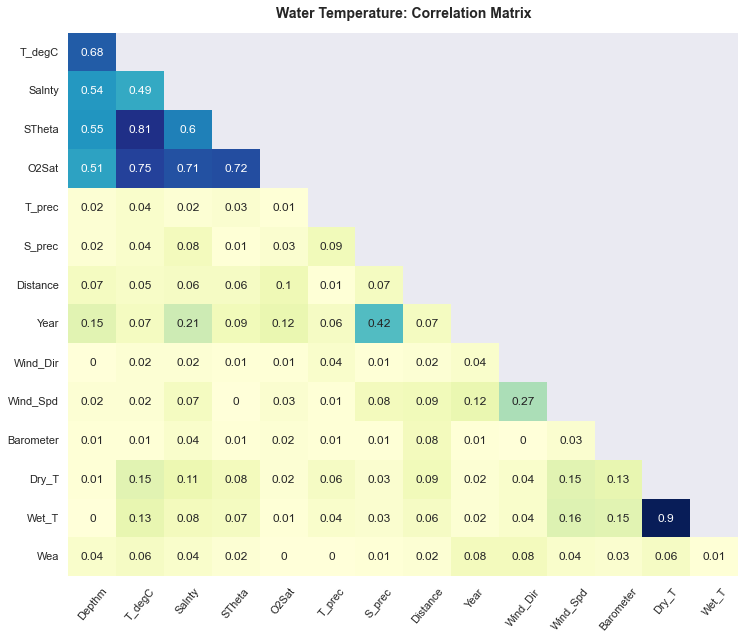

In [55]:
# Set Figure Size
sns.set(rc={'figure.figsize':(12,10)})

# Visually display the matrix from above
# use the yellow-green-blue color map so that high correlations are more easily identifiable
h = sns.heatmap(temp_corr_tri2, annot=True, cmap="YlGnBu", cbar=False)

# Add plot title 
h.set_title('Water Temperature: Correlation Matrix', size=14, weight='bold', pad=15)

# rotate tick marks so they are easier to read
plt.xticks(rotation=50)

# Make plots larger
#plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

# Display plot
plt.show()

Based on the above plot, the following variables have a high correlation with water temperature:
- STheta (0.81)
- O2sat (0.75)
- Depthm (0.68)
- Salnty (0.49)

Of those variables, none have correlations with each other greater than 0.75
- However, STheta is highly correlated fairly highly correlation with O2sat (0.72). Moreover, O2Sat is the only variable in this list that has a positive correlation with water temperature. Therefore, we will use Potential Density of Water (STheta), Depth in meters (Depthm), and Salinity of water (Salnty) as our predictors in the model.

In [57]:
# Create the final data frame that we will use for our model
predict_temp = new_df2[['T_degC', 'STheta', 'Depthm', 'Salnty']]

# View first few rows
predict_temp.head()

,T_degC,STheta,Depthm,Salnty
0,10.50,25.649,0,33.440
1,10.46,25.656,8,33.440
2,10.46,25.654,10,33.437
3,10.45,25.643,19,33.420
4,10.45,25.643,20,33.421


<AxesSubplot:xlabel='STheta'>

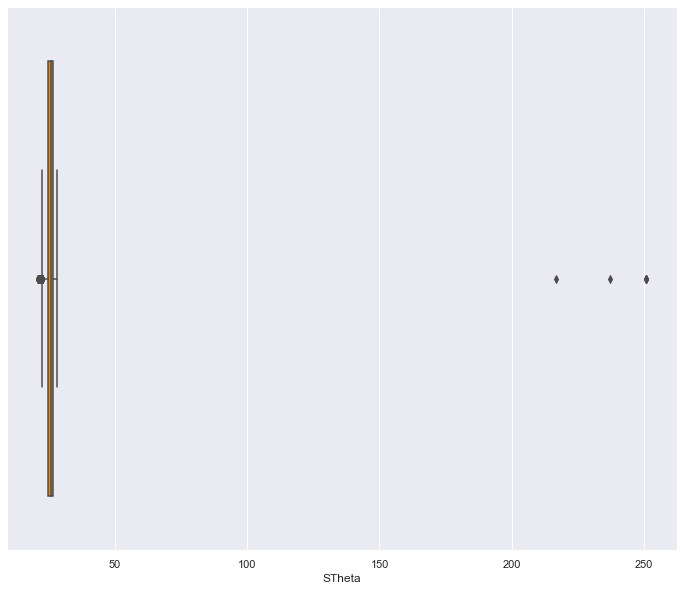

In [59]:
# Density box plot
sns.boxplot(x='STheta', color='darkorange', data=predict_temp)

<AxesSubplot:xlabel='Depthm'>

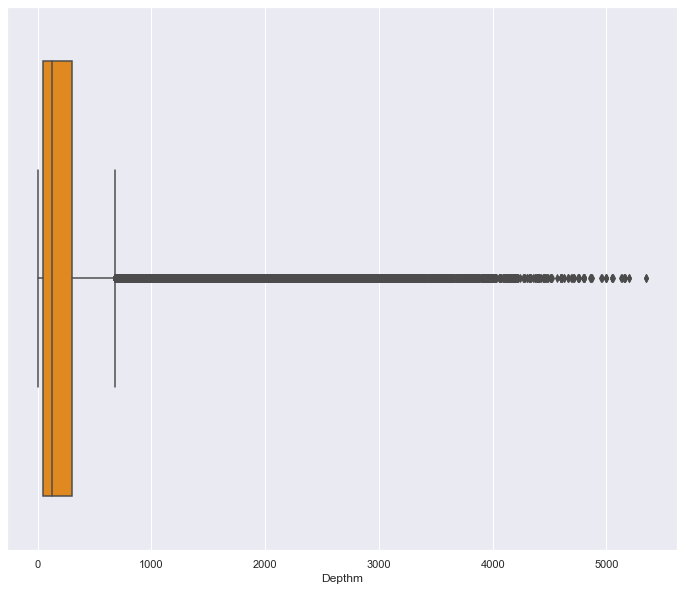

In [60]:
# Depth box plot
sns.boxplot(x='Depthm', color='darkorange', data=predict_temp)

<AxesSubplot:xlabel='Salnty'>

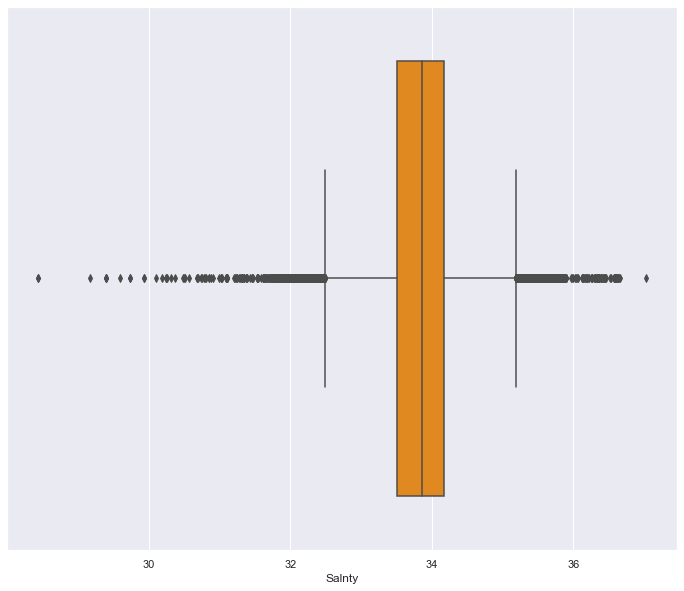

In [61]:
# Salinity box plot
sns.boxplot(x='Salnty', color='darkorange', data=predict_temp)

### 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

**Assumptions for multiple regression**
- Variable Type: at least one continuous predictor, and outcome is continuous 
- Non-Zero Variance: X’s have to vary somehow 
- Linearity: See Scatterplot of raw data 
- Independence of Observations: Every observation was one person.  
- Independence of Errors: Durbin-Watson 
- Multicollinearity: VIF or Tolerance 
- Homoscedasticity: See scatterplot of residuals 
- Normally Distributed Errors: histogram of errors 
- Normality of raw data 

### 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

### 5.	Work with the diabetes dataset to perform multiple logistic regression. 

### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

### 7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

### 8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?

# Data Camp Certificates

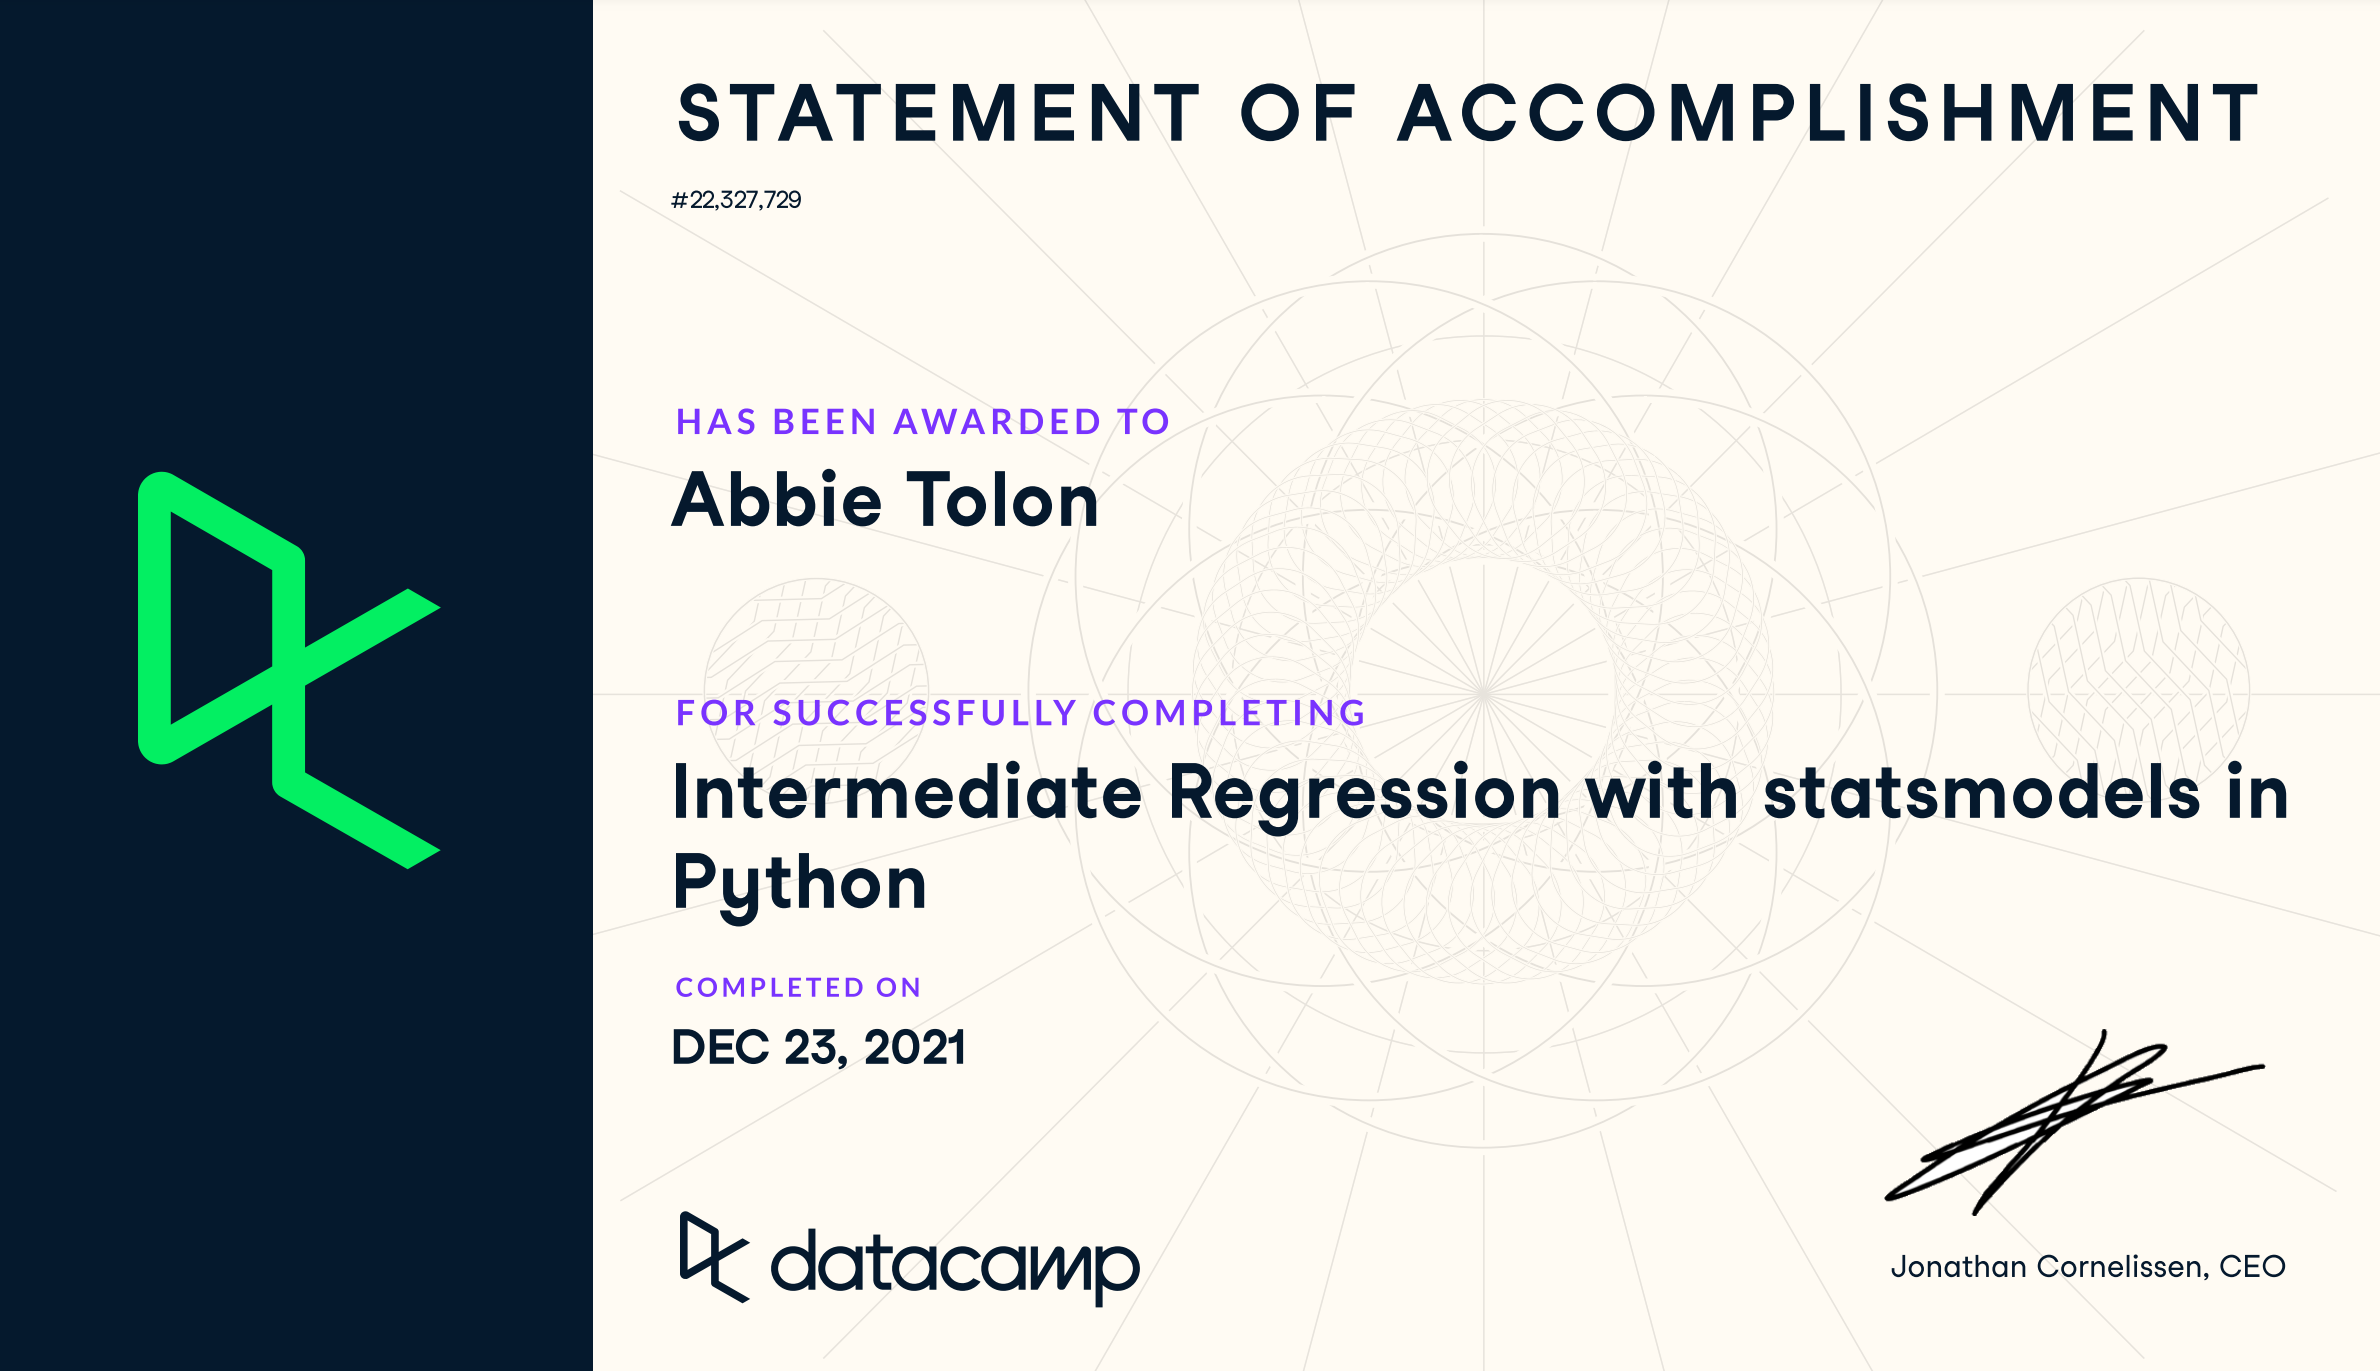